In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Beta:  [[0.70739978]]
R^2:  0.7622130450481777


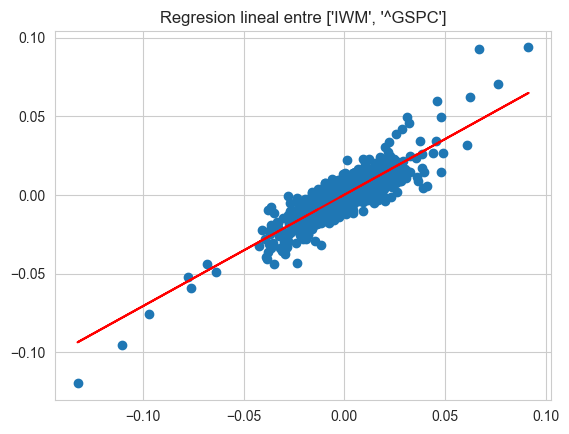

In [44]:
tickers = ['IWM', '^GSPC']

data = pd.DataFrame()

for ticker in tickers:
    ticker_data = yf.download(ticker, start='2015-01-01', end='2022-01-01')['Adj Close']
    data[ticker] = ticker_data

returns = data.pct_change()

X = np.array(returns['IWM'].iloc[1:]).reshape(-1, 1)
Y = np.array(returns['^GSPC'].iloc[1:]).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

Y_pred = lin_reg.predict(X)

beta = lin_reg.coef_

r2 = r2_score(Y, Y_pred)

fig, ax = plt.subplots()
ax.set_title("Regresion lineal entre " + str(tickers))
ax.scatter(X, Y)
ax.plot(X, Y_pred, c="red")
print("Beta: ", beta)
print("R^2: ", r2)
plt.show()



Este código realiza un análisis de regresión lineal entre dos activos financieros representados por los símbolos 'IWM' (ETF del Russell 2000) y '^GSPC' (índice S&P 500). Aquí está lo que hace cada parte del código:

Se importan las bibliotecas necesarias: pandas, numpy, sklearn, pandas_datareader, y matplotlib.pyplot. Estas bibliotecas se utilizan para manejar datos, realizar cálculos numéricos, entrenar un modelo de regresión lineal, descargar datos financieros y visualizar la gráfica.

Se definen los tickers de los activos ('IWM' y '^GSPC').

Se crea un DataFrame vacío llamado data que se utilizará para almacenar los datos de cierre ajustados ('Adj Close') de los activos financieros.

Se itera sobre cada ticker en la lista de tickers. Para cada ticker, se descargan los datos de cierre ajustados desde '2015-01-01' hasta '2022-01-01' utilizando la función yf.download() de la biblioteca yfinance. Los datos se almacenan en el DataFrame data, utilizando el ticker como nombre de columna.

Se calculan los retornos diarios utilizando el método pct_change() del DataFrame data.

Se seleccionan los retornos del ETF del Russell 2000 ('IWM') y del índice S&P 500 ('^GSPC') para utilizarlos como variables independiente (X) y dependiente (Y), respectivamente, en el modelo de regresión lineal.

Se crea un objeto de regresión lineal utilizando la clase LinearRegression() de sklearn.

Se ajusta el modelo de regresión lineal utilizando los datos de entrenamiento (X, Y) utilizando el método fit() del objeto lin_reg.

Se realizan predicciones de Y utilizando el modelo ajustado y los datos de X, almacenando las predicciones en Y_pred.

Se calcula el coeficiente beta del modelo de regresión lineal utilizando el atributo coef_ del objeto lin_reg.

Se calcula el coeficiente de determinación (R^2) utilizando la función r2_score() de sklearn.

Se crea una nueva figura y un nuevo eje para la gráfica utilizando plt.subplots().

Se establece el título del gráfico como "Regresión lineal entre 'IWM' y '^GSPC'".

Se grafican los datos de X e Y utilizando puntos azules, y se grafica la línea de regresión utilizando una línea roja.

Se imprime el valor del coeficiente beta y del coeficiente de determinación (R^2).

Se muestra la gráfica utilizando plt.show().

La gráfica muestra los retornos diarios del ETF del Russell 2000 ('IWM') en el eje X y los retornos diarios del índice S&P 500 ('^GSPC') en el eje Y. La línea roja representa la línea de regresión ajustada a estos datos, lo que nos permite visualizar la relación lineal entre los dos activos financieros. Cuanto más se acerquen los puntos azules a la línea roja, mayor será la relación lineal entre los dos activos. El coeficiente de determinación (R^2) nos proporciona una medida de qué tan bien se ajusta la línea de regresión a los datos. Un valor de R^2 cercano a 1 indica un buen ajuste del modelo a los datos.